In [37]:
import tensorflow as tf

from pathlib import Path
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt
from pathlib import Path
import math

np.set_printoptions(threshold=np.nan)

In [46]:
# coding: utf-8

# In[20]:



labels = ['a_h', 'a_k', 'chi_h', 'chi_k', 'e_h', 'e_k', 'fu_h', 'fu_k', 'ha_h', 'ha_k',
         'he_h', 'he_k', 'hi_h', 'hi_k', 'ho_h', 'ho_k', 'i_h', 'i_k', 'ka_h', 'ka_k',
         'ke_h', 'ke_k', 'ki_h', 'ki_k', 'ko_h', 'ko_k', 'ku_h', 'ku_k', 'ma_h', 'ma_k',
         'me_h', 'me_k', 'mi_h', 'mi_k', 'mo_h', 'mo_k', 'mu_h', 'mu_k', 'na_h', 'na_k',
         'ne_h', 'ne_k', 'ni_h', 'ni_k', 'no_h', 'no_k', 'nu_h', 'nu_k', 'n_h', 'n_k', 
         'o_h', 'o_k', 'ra_h', 'ra_k', 're_h', 're_k', 'ri_h', 'ri_k', 'ro_h', 'ro_k',
         'ru_h', 'ru_k', 'sa_h', 'sa_k', 'se_h', 'se_k', 'shi_h', 'shi_k', 'so_h', 'so_k',
         'su_h', 'su_k', 'ta_h', 'ta_k', 'te_h', 'te_k', 'to_h', 'to_k', 'tsu_h', 'tsu_k',
         'u_h', 'u_k', 'wa_h', 'wa_k', 'wo_h', 'wo_k', 'ya_h', 'ya_k', 'yo_h', 'yo_k', 'yu_h', 'yu_k']

labels_kata=['a_k', 'chi_k', 'e_k', 'fu_k', 'ha_k', 'he_k', 'hi_k', 'ho_k', 'i_k', 
              'ka_k', 'ke_k', 'ki_k', 'ko_k', 'ku_k', 'ma_k', 'me_k', 'mi_k', 'mo_k',
              'mu_k', 'na_k', 'ne_k', 'ni_k', 'no_k', 'nu_k', 'n_k', 'o_k', 'ra_k', 're_k', 'ri_k', 'ro_k', 'ru_k',
              'sa_k', 'se_k', 'shi_k', 'so_k', 'su_k', 'ta_k', 'te_k', 'to_k', 'tsu_k', 'u_k',
              'wa_k', 'wo_k', 'ya_k', 'yo_k', 'yu_k']

alphabet_dicts={'a_h': ' あ', 'a_k': 'ア ', 'chi_h': 'ち ', 'chi_k': 'チ ', 'e_h': 'え ', 'e_k': ' エ', 'fu_h': 'ふ ', 'fu_k': 'フ ',
       'ha_h': 'は ', 'ha_k': ' ハ', 'he_h': ' へ', 'he_k': 'ヘ ', 'hi_h': 'ひ ', 'hi_k': ' ヒ', 'ho_h': 'ほ ', 'ho_k': 'ホ ',
       'i_h': ' い', 'i_k': 'キ ', 'ka_h': 'か', 'ka_k': ' カ', 'ke_h': 'け ', 'ke_k': ' ケ', 'ki_h': ' き', 'ki_k': 'キ ',
       'ko_h': ' こ', 'ko_k': 'コ ', 'ku_h': 'く ', 'ku_k': ' ク', 'ma_h': ' ま', 'ma_k': ' マ', 'me_h': 'め ', 'me_k': 'メ ', 
       'mi_h': ' み', 'mi_k': ' ミ', 'mo_h': ' も', 'mo_k': ' モ', 'mu_h': ' む', 'mu_k': 'ム ', 'n_h': 'ン', 'n_k': 'ン ',
       'na_h': 'な ', 'na_k': ' ナ', 'ne_h': 'ね ', 'ne_k': 'ネ ', 'ni_h': 'に ', 'ni_k': 'ニ ', 'no_h': ' の', 'no_k': ' ノ',
       'nu_h': ' ぬ', 'nu_k': ' ヌ', 'o_h': ' お', 'o_k': 'オ ', 'ra_h': ' ら', 'ra_k': 'ラ ', 're_h': 'れ ', 're_k': 'レ ',
       'ri_h': 'り ', 'ri_k': ' リ', 'ro_h': ' ろ', 'ro_k': ' ロ', 'ru_h': ' る', 'ru_k': 'ル ', 'sa_h': ' さ', 'sa_k': 'サ ', 
       'se_h': 'せ ', 'se_k': 'セ ', 'shi_h': 'し ', 'shi_k': 'シ ', 'so_h': 'そ ', 'so_k': 'ソ ', 'su_h': 'す ', 'su_k': ' ス',
       'ta_h': ' た', 'ta_k': 'タ ', 'te_h': 'て ', 'te_k': 'テ ', 'to_h': 'と ', 'to_k': ' ト', 'tsu_h': 'つ ', 'tsu_k': 'ツ',
       'u_h': ' う', 'u_k': ' ウ', 'wa_h': 'わ ', 'wa_k': 'ワ ', 'wo_h': ' を', 'wo_k': 'ヲ ', 'ya_h': 'や ', 'ya_k': 'ヤ ', 
       'yo_h': 'よ ', 'yo_k': ' ヨ', 'yu_h': ' ゆ', 'yu_k': 'ユ '}

alphabet_kata ={'a_k': 'ア ', 'chi_k': 'チ ', 'e_k': ' エ', 'fu_k': 'フ ', 'ha_k': ' ハ', 'he_k': 'ヘ ', 
                'hi_k': ' ヒ', 'ho_k': 'ホ ', 'i_k': 'キ ', 'ka_k': ' カ', 'ke_k': ' ケ', 'ki_k': 'キ ', 
                'ko_k': 'コ ', 'ku_k': ' ク', 'ma_k': ' マ', 'me_k': 'メ ', 'mi_k': ' ミ', 'mo_k': ' モ',
                'mu_k': 'ム ', 'n_k': 'ン ', 'na_k': ' ナ', 'ne_k': 'ネ ', 'ni_k': 'ニ ', 'no_k': ' ノ', 
                'nu_k': ' ヌ', 'o_k': 'オ ', 'ra_k': 'ラ ', 're_k': 'レ ', 'ri_k': ' リ', 'ro_k': ' ロ', 
                'ru_k': 'ル ', 'sa_k': 'サ ', 'se_k': 'セ ', 'shi_k': 'シ ', 'so_k': 'ソ ', 'su_k': ' ス',
                'ta_k': 'タ ', 'te_k': 'テ ', 'to_k': ' ト', 'tsu_k': 'ツ', 'u_k': ' ウ', 'wa_k': 'ワ ',
                'wo_k': 'ヲ ', 'ya_k': 'ヤ ', 'yo_k': ' ヨ', 'yu_k': 'ユ '}         

def get_japanese_alphabet(index):
    index =int(index)
    key = labels_kata[index]
    
    return alphabet_kata[key]
          
def convert_image_to_input(file_image):
    img_size = 64
    num_channels = 1
    file_image = str(file_image)
    images = []
    img = cv2.imread(file_image,0) 
    img = cv2.resize(img, (img_size, img_size))
#     print(np.max(img))
#     print(img.shape)
    


#     convert image input with 3 channels
#     for i in range(64):
#         for j in range(64):
#             for k in range(1):
#     #             print(f"i: {i}, j {j}, k {k}, {a[i,j,:]}")
#                 if (np.all(img[i,j,k]>= (0,0,250))):
#                     gray_color = np.random.randint(250,255,3)
#                     img[i,j,:]=gray_color
#     #                 print(f"i: {i}, j {j}, k {k}, {a[i,j,:]}")
                    

##     convert image input grayscale   
    for i in range(64):
        for j in range(64):
            if img[i,j] >=40:
                img[i,j]=255

#     print(img)
    ## take image to center  
    img= cv2.resize(img,(40,40))
#     img =np.pad(img, ((12, 12), (12, 12),(0,0)), 'constant', constant_values=(0)) # 3channels

    img =np.pad(img, ((12, 12), (12, 12)), 'constant', constant_values=(0)) # img grayscale

    
    cv2.imwrite(".\image\iw1.png",img)
#     cv2.imshow("img",img)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()
    plt.imshow(img,cmap="gray") #cmap="gray"
    plt.show()

    img = img.astype(np.float32)
    img = np.multiply(img, 1.0 / 255.0)

    images.append(img)

    images = np.array(images)
    #     print(images.shape)

    x_batch = images.reshape(-1, img_size, img_size, num_channels)
    # print(x_batch.shape)

    return x_batch


# In[22]:

class Test(object):
    def __init__(self, path_img):
#         tf.reset_default_graph()
        my_config =tf.ConfigProto(allow_soft_placement=True,log_device_placement=True)
        my_config.gpu_options.allow_growth = True
        
        self.sess = tf.Session(config=my_config)
        path_model_last = tf.train.latest_checkpoint(r"..\a_model_khoa_luan\model")
        print(f"path_model_last: {path_model_last}")
        saver = tf.train.import_meta_graph(path_model_last +".meta", clear_devices=True)
        saver.restore(self.sess, path_model_last)

        self.graph = tf.get_default_graph()
        self.keep_prob = self.graph.get_tensor_by_name("inputs/keep_prob:0")
        self.x = self.graph.get_tensor_by_name("inputs/x:0")
        print(self.x.shape)
    
        self.path_img = str(path_img)
    def listOfTensor(self):
        for tensor in self.graph.as_graph_def().node:
            print(tensor.name)
#         for op in self.graph.get_operations():
#             print (str(op.name)) 

    def print_layer(self, ):
       
        
        x_batch = convert_image_to_input(self.path_img)
        layer = self.graph.get_tensor_by_name("conv4/conv4:0")
        
        layer = self.sess.run(layer,feed_dict={self.x:x_batch, self.keep_prob:1.0})
        #prin(layer.shpae) #[?,64,64,channel] ?: amount input
        num_filters = layer.shape[3]
        
        num_grids = math.ceil(math.sqrt(num_filters))
        
        fig, axes = plt.subplots(num_grids, num_grids)
        for i, ax in enumerate(axes.flat):
            if i<num_filters:
                img = layer[0, :, :, i]

                ax.imshow(img, interpolation='nearest', cmap='binary')
            ax.set_xticks([])
            ax.set_yticks([])
    
        plt.show()
    
    def print_weight(self):
        w= self.graph.get_tensor_by_name("conv1/weights/conv1_weights:0")
        print(w.shape) #(3, 3, 3, 32) width, height, deep, channel
        w=self.sess.run(w)
        print(w[:,:,0,0])
        w_min = np.min(w)
        w_max=np.max(w)
        num_filters = w.shape[3]
        
        num_grids = math.ceil(math.sqrt(num_filters)) # lấy trần
        
        fig, axes = plt.subplots(num_grids, num_grids)
        for i, ax in enumerate(axes.flat):
            if i<num_filters:
                img = w[:, :, 0, i]

                ax.imshow(img, vmin=w_min, vmax=w_max,
                          interpolation='nearest', cmap='binary' ) #cmap: seismic, binary
            ax.set_xticks([])
            ax.set_yticks([])
    
        plt.show()
    def predict(self):
        
        y_pred = self.graph.get_tensor_by_name("Test/y_pred:0")

        
        # y_true = graph.get_tensor_by_name("y_true:0")

        x_batch = convert_image_to_input(self.path_img)
        result = self.sess.run(y_pred, feed_dict={self.x: x_batch, self.keep_prob:1.0})
#         print(result)
#         print(np.argmax(result,1 ))
#         print(np.max(result))
        index_result = np.argmax(result,1)
        acc =np.max(result)
        alphabet_japan = get_japanese_alphabet(index_result)
        
        return [alphabet_japan,acc]



path_model_last: ..\a_model_khoa_luan\model\modelTest.ckpt-2
INFO:tensorflow:Restoring parameters from ..\a_model_khoa_luan\model\modelTest.ckpt-2
(?, 64, 64, 1)


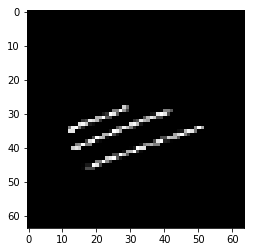

['ユ ', 0.58698034]


In [48]:

# # p1= r".\image\a_den.png"

# # lap huy
# p1=r"C:\Users\buico\b_khoaluan\data_test\a.png"
# p1=r"C:\Users\buico\b_khoaluan\image\predict.png"
# # p1=r"C:\Users\buico\b_khoaluan\image\paint.png"



# t=Test(p1)

# # t.listOfTensor()

# pred = t.predict()
# print(pred)

# # t.print_layer()
# # t.print_weight()

dicts={'a_h': ' あ', 'a_k': 'ア ', 'chi_h': 'ち ', 'chi_k': 'チ ', 'e_h': 'え ', 'e_k': ' エ', 'fu_h': 'ふ ', 'fu_k': 'フ ',
       'ha_h': 'は ', 'ha_k': ' ハ', 'he_h': ' へ', 'he_k': 'ヘ ', 'hi_h': 'ひ ', 'hi_k': ' ヒ', 'ho_h': 'ほ ', 'ho_k': 'ホ ',
       'i_h': ' い', 'i_k': 'キ ', 'ka_h': 'か', 'ka_k': ' カ', 'ke_h': 'け ', 'ke_k': ' ケ', 'ki_h': ' き', 'ki_k': 'キ ',
       'ko_h': ' こ', 'ko_k': 'コ ', 'ku_h': 'く ', 'ku_k': ' ク', 'ma_h': ' ま', 'ma_k': ' マ', 'me_h': 'め ', 'me_k': 'メ ', 
       'mi_h': ' み', 'mi_k': ' ミ', 'mo_h': ' も', 'mo_k': ' モ', 'mu_h': ' む', 'mu_k': 'ム ', 'n_h': 'ン', 'n_k': 'ン ',
       'na_h': 'な ', 'na_k': ' ナ', 'ne_h': 'ね ', 'ne_k': 'ネ ', 'ni_h': 'に ', 'ni_k': 'ニ ', 'no_h': ' の', 'no_k': ' ノ',
       'nu_h': ' ぬ', 'nu_k': ' ヌ', 'o_h': ' お', 'o_k': 'オ ', 'ra_h': ' ら', 'ra_k': 'ラ ', 're_h': 'れ ', 're_k': 'レ ',
       'ri_h': 'り ', 'ri_k': ' リ', 'ro_h': ' ろ', 'ro_k': 'ﾛ', 'ru_h': ' る', 'ru_k': 'ル ', 'sa_h': ' さ', 'sa_k': 'サ ', 
       'se_h': 'せ ', 'se_k': 'セ ', 'shi_h': 'し ', 'shi_k': 'シ ', 'so_h': 'そ ', 'so_k': 'ソ ', 'su_h': 'す ', 'su_k': ' ス',
       'ta_h': ' た', 'ta_k': 'タ ', 'te_h': 'て ', 'te_k': 'テ ', 'to_h': 'と ', 'to_k': ' ト', 'tsu_h': 'つ ', 'tsu_k': 'ツ',
       'u_h': ' う', 'u_k': ' ウ', 'wa_h': 'わ ', 'wa_k': 'ワ ', 'wo_h': ' を', 'wo_k': 'ヲ ', 'ya_h': 'や ', 'ya_k': 'ヤ ', 
       'yo_h': 'よ ', 'yo_k': ' ヨ', 'yu_h': ' ゆ', 'yu_k': 'ユ '}

In [39]:
# dicts=alphabet_dicts.copy()
# for i,key in enumerate(alphabet_dicts):
#     if i%2==0:
#         del(dicts[key])
# print(dicts)
# len(dicts)

# x= labels.copy()
# for i,val in enumerate(x):
#     if i%2==0:
#         labels.remove(val)
# print(labels)
# print(len(labels))

['a_k', 'chi_k', 'e_k', 'fu_k', 'ha_k', 'he_k', 'hi_k', 'ho_k', 'i_k', 'ka_k', 'ke_k', 'ki_k', 'ko_k', 'ku_k', 'ma_k', 'me_k', 'mi_k', 'mo_k', 'mu_k', 'na_k', 'ne_k', 'ni_k', 'no_k', 'nu_k', 'n_k', 'o_k', 'ra_k', 're_k', 'ri_k', 'ro_k', 'ru_k', 'sa_k', 'se_k', 'shi_k', 'so_k', 'su_k', 'ta_k', 'te_k', 'to_k', 'tsu_k', 'u_k', 'wa_k', 'wo_k', 'ya_k', 'yo_k', 'yu_k']
46
